In [270]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

data_merged_unfinished = pd.merge(study_results, mouse_metadata,  on= 'Mouse ID' , how= 'outer' )

# display(study_results)
data_merged_unfinished

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [271]:
# Checking the number of mice.
mice_count = len(data_merged_unfinished['Mouse ID'].unique())
mice_count

249

In [272]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_mask = data_merged_unfinished.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicates_data = data_merged_unfinished[duplicates_mask]

#the unique 'Mouse ID' values of the tainted mice
tainted_mouse_ids = duplicates_data['Mouse ID'].unique()
# Use boolean indexing to select rows where the 'Mouse ID' is not in the tainted_mouse_ids list
clean_data = data_merged_unfinished.loc[~data_merged_unfinished['Mouse ID'].isin(tainted_mouse_ids)]

display(clean_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [273]:
tainted_mouse_ids = duplicates_data['Mouse ID'].unique()
tainted_mouse_ids

array(['g989'], dtype=object)

In [274]:
# Optional: Get all the data for the duplicate mouse ID. 
tainted_data = data_merged_unfinished.loc[data_merged_unfinished['Mouse ID'].isin(tainted_mouse_ids)]
tainted_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [275]:
# Create a clean DataFrame by dropping the duplicate mouse by it ID.
clean_data = data_merged_unfinished.copy()


clean_data = clean_data[clean_data['Mouse ID'] != tainted_mouse_id]

display(clean_data)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [276]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean=clean_data['Mouse ID'].unique()
len(mice_count_clean)

248

In [277]:
#using gropby method
regimen_grouped_data = clean_data.groupby('Drug Regimen')
regimen_grouped_data


In [278]:
# calculating the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].median()
variance_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].std()
sem_tumor_volume = regimen_grouped_data['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame
summary_statistics = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor_volume,
    'Median Tumor Volume': median_tumor_volume,
    'Tumor Volume Variance': variance_tumor_volume,
    'Tumor Volume Std. Dev.': std_dev_tumor_volume,
    'Tumor Volume SEM': sem_tumor_volume})
display(summary_statistics)



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [279]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_statistics_aggregation = regimen_grouped_data['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics_aggregation

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


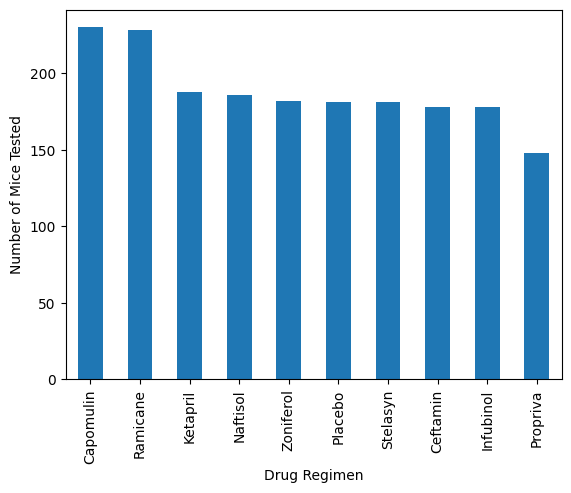

In [280]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#counting the timepoints in the grouped data 
timepoints_count = regimen_grouped_data['Timepoint'].count()
timepoints_count_sorted = timepoints_count.sort_values(ascending=False)
#creating bar blot
timepoints_count_sorted.plot(kind='bar', xlabel='Drug Regimen', ylabel='Number of Mice Tested')
plt.show()

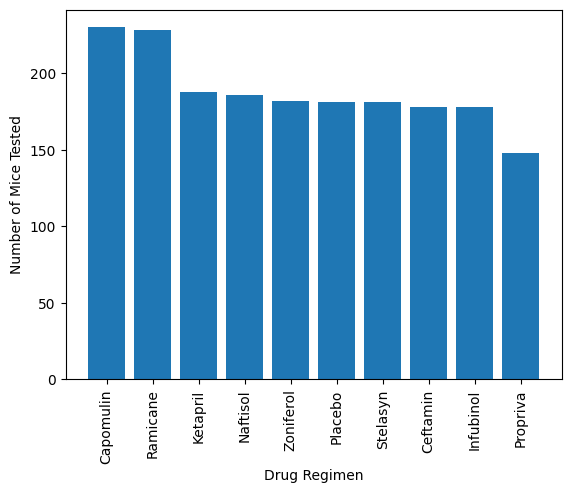

In [281]:
# creating a plot using pyplot
plt.bar(timepoints_count_sorted.index, timepoints_count_sorted.values)

#labels for x-axis and y-axis
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')

#rotating the x-axis labels
plt.xticks(rotation=90)

plt.show()



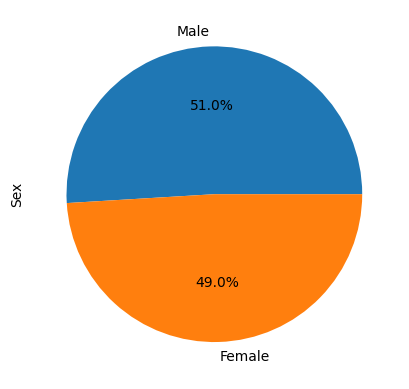

In [295]:
# Group the merged_data DataFrame by the 'Sex' column and count the number of unique mice
sex_distribution = clean_data['Sex'].value_counts()
# Create a pie plot using Pandas
sex_distribution.plot(kind='pie',autopct='%1.1f%%')


plt.ylabel('Sex')

# Display the plot
plt.show()


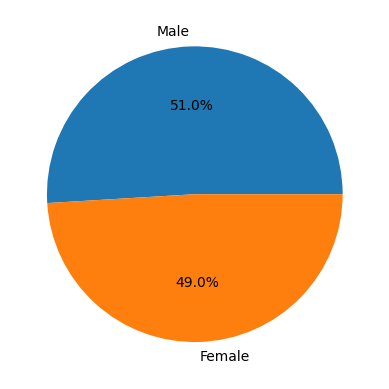

In [292]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(sex_distribution.values, labels=sex_distribution.index, autopct='%1.1f%%')

plt.show()

In [284]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Assuming the column for drug regimen is named 'Drug Regimen',
# the column for timepoints is named 'Timepoint',
# and the column for tumor volume is named 'Tumor Volume (mm3)'

# Filter the merged_data DataFrame to keep only rows with specified 'Drug Regimen' values
filtered_data = data_merged_unfinished[data_merged_unfinished['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Group the filtered_data DataFrame by 'Mouse ID' and get the last (greatest) timepoint for each mouse
last_timepoint = filtered_data.groupby('Mouse ID')['Timepoint'].max()

# Reset the index of the resulting DataFrame
last_timepoint = last_timepoint.reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, data_merged_unfinished, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [285]:

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Iterate through the list of treatments
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volumes to the tumor_vol_data list
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate the IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Convert the NumPy array to a pandas Series
    outliers = pd.Series(outliers.values, name='Tumor Volume (mm3)')
    
    # Print the results
    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
